# Museus
#### Projeto Final: Análise Exploratória de Dados



### Dataset:

Dataset possui uma lista de museus e organizações relacionadas nos Estados Unidos. As informações incluidas são: 
- Nome;
- Tipo do Museu;
- Nome da Instituição;
- Localização (Rua, Cidade, Zipcode, Longitude);
- Renda e Receita.

https://www.kaggle.com/datasets/imls/museum-directory


### Análise Exploratória de Dados:

#### Carregamento de dados:

In [114]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns

# Importando o Dataset
dados = pd.read_csv('/museums.csv', low_memory = False)

Primeiramente vamos nos familiarizar com os dados

In [115]:
dados.head()

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


Utilizamos o *dados.describe()* e *dados.info()* para obter um resumo rápido da estrutura dos dados. 

In [116]:
dados.describe()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33072 entries, 0 to 33071
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Museum ID                                 33072 non-null  int64  
 1   Museum Name                               33072 non-null  object 
 2   Legal Name                                33072 non-null  object 
 3   Alternate Name                            1927 non-null   object 
 4   Museum Type                               33072 non-null  object 
 5   Institution Name                          2749 non-null   object 
 6   Street Address (Administrative Location)  33062 non-null  object 
 7   City (Administrative Location)            33072 non-null  object 
 8   State (Administrative Location)           33072 non-null  object 
 9   Zip Code (Administrative Location)        33072 non-null  object 
 10  Street Address (Physical Location)

A partir das observações feitas com as funções acima, então podemos verificar que algumas colunas estão preenchidas em todos os casos, como por exemplo, *Museum ID, Museum Name, ...*, totalizando 33072 linhas observações.

No entanto, algumas colunas possuem valores nulos, pontualmente as colunas *Street Address (Physical Location)* e *Zip Code (Physical Location)* omissões de dados mais críticas. 

Além disso, o dado *Tax Period - Date* estava fora da formatação esperada (data/texto), assim foi necessário fazer a mudança de tipo de dado de *float* para *datetime*.

In [117]:
# Alteração de tipo de dado para Datetime
dados['Tax Period - Date'] = pd.to_datetime(dados['Tax Period'], format = '%Y%m')

#### Análise de dados:

Utilizando as colunas de receita e faturamento, foi feita a análise de possível lucro do museu durante da última declaração de imposto disponível. Com isso, foi criada a coluna *Lucrou* com dados Verdadeiro/Falso quanto a lucratividade.

In [118]:
dados['Profit'] = dados['Revenue'] - dados['Income']
dados['Lucrou'] = dados['Profit'] > 0
dados.head()

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,20.0,2.0,6,920071852,201312.0,602912.0,550236.0,2013-12-01,-52676.0,False
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0,2013-12-01,-55834.0,False
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,122.0,2.0,6,921761906,201312.0,740030.0,729080.0,2013-12-01,-10950.0,False
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,122.0,2.0,6,920165178,201412.0,0.0,0.0,2014-12-01,0.0,False
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,20.0,2.0,6,920071852,201312.0,602912.0,550236.0,2013-12-01,-52676.0,False


Para a análise da quantidade única de museus no nosso dataset foi utilizada a função *unique()*:

In [119]:
print(len(dados['Museum ID'].unique()))
print(len(dados['Museum Name'].unique()))

33072
31546


Com a análise feita acima, sobre a unicidade dos dados foi verificado quanto a duplicade dos museus registrados. Para isso, foi verificado quanto a quantidade dos museus com o mesmo *Street Address*, ordenando de forma ascendente: 

In [120]:
dados.groupby('Museum Name')["Street Address (Administrative Location)"].value_counts().sort_values(ascending=False)

Museum Name                                 Street Address (Administrative Location)
ALBION VALLEY HISTORICAL SOCIETY            PO BOX 532                                  2
MADISON COUNTY HISTORICAL SOCIETY           435 MAIN ST                                 2
PANHANDLE-PLAINS HISTORICAL MUSEUM          2503 4TH AVE                                2
GOLETA VALLEY HISTORICAL SOCIETY            304 N LOS CARNEROS RD                       2
MUSEUM OF CONTEMPORARY PHOTOGRAPHY          600 SOUTH MICHIGAN AVENUE                   2
                                                                                       ..
GRACIE MANSION CONSERVANCY                  88TH STREET AT EAST END AVE                 1
GRACIE JIU-JITSU MUSEUM                     3515 ARTESIA BLVD                           1
GRACEVILLE HISTORICAL SOCIETY               PO BOX 322                                  1
GRACE MUSEUM                                PO BOX 33                                   1
ZYDECO HISTORIC

In [121]:
dados[dados["Museum Name"]=="MUSEUM OF CONTEMPORARY PHOTOGRAPHY"]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
9289,8409503762,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,COLUMBIA COLLEGE,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,ART MUSEUM,COLUMBIA COLLEGE CHICAGO,600 SOUTH MICHIGAN AVENUE,CHICAGO,IL,60605,...,31.0,17.0,4,366112087,201308.0,263041160.0,256922328.0,2013-08-01,-6118832.0,False
9290,8401700095,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,MUSEUM OF CONTEMPORARY PHOTOGRAPHY,NaN,GENERAL MUSEUM,NaN,600 SOUTH MICHIGAN AVENUE,CHICAGO,IL,60605,...,31.0,17.0,4,NaN,NaN,NaN,NaN,NaT,NaN,False


Com a interpretação dos resultados, foi verificado que alguns dados possuem duplicidade na, provável, tentativa de atualização destes dados pelo usuário. Contanto, a abordagem feita pelo grupo foi a identificação desses dados duplicados em um diferente Dataset para uma posterior análise (embasada) em um estudo futuro.

In [122]:
duplicadosDf = dados[dados.duplicated("Museum Name")]
print("Quantidade de Duplicados:", duplicadosDf.shape[0])
duplicadosDf.head()


Quantidade de Duplicados: 1526


,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
270,8409502904,CALHOUN FINE ARTS GALLERY,CALHOUN FINE ARTS GALLERY,NaN,ART MUSEUM,JOHN C CALHOUN STATE COMMUNITY COLLEGE,102 WYNN DR NW,HUNTSVILLE,AL,35805,...,89.0,1.0,3,630505871,NaN,NaN,NaN,NaT,NaN,False
456,8400100425,MARENGO COUNTY HISTORICAL SOCIETY,ELIZABETH LAIRD TR UW 101993 FBO MARENGO COUNT...,NaN,HISTORIC PRESERVATION,NaN,PO BOX 490,DEMOPOLIS,AL,36732,...,91.0,1.0,3,636187139,201312.0,570352.0,94581.0,2013-12-01,-475771.0,False
656,8409502735,ART GALLERY,JOHN BROWN UNIVERSITY,NaN,ART MUSEUM,JOHN BROWN UNIVERSITY,2000 WEST UNIVERSITY STREET,SILOAM SPRINGS,AR,72761,...,7.0,5.0,3,710239576,201406.0,90059515.0,73739473.0,2014-06-01,-16320042.0,False
657,8409502755,ART GALLERY,ART GALLERY,NaN,ART MUSEUM,SOUTHERN ARKANSAS UNIVERSITY,100 EAST UNIVERSITY STREET,MAGNOLIA,AR,71753,...,27.0,5.0,3,716007749,NaN,NaN,NaN,NaT,NaN,False
735,8409503168,FINE ARTS CENTER GALLERY,FINE ARTS CENTER GALLERY,NaN,ART MUSEUM,ARKANSAS STATE UNIVERSITY,PO BOX 600,STATE UNIVERSITY,AR,72467,...,31.0,5.0,3,716000556,NaN,NaN,NaN,NaT,NaN,False


Para os itens duplicados não comprometerem o resultado das análises posteriores, foi decidido pelo grupo a remoção desses dados do dataset principal.


In [123]:
 dados = dados[~dados.duplicated("Museum Name")]

Uma outra possível análise é a verificação do ranking da quantidade de museus por *Zip Code (Physical Location)*

In [124]:
dados['Zip Code (Physical Location)'].value_counts()

74743.0    50
92101.0     8
77550.0     8
87504.0     7
1103.0      7
           ..
1773.0      1
1054.0      1
1057.0      1
2536.0      1
82072.0     1
Name: Zip Code (Physical Location), Length: 6655, dtype: int64

No Zipcode *74743* foram elencados 50 diferentes museus, listados abaixo:

In [125]:
dados[dados['Zip Code (Physical Location)']==74743.0]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
23607,8404000270,APPALACHIAN CHILDREN'S MUSEUM AND LEARNING CENTER,APPALACHIAN CHILDRENS MUSEUM AND LEARNING CENT...,NaN,CHILDREN'S MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,195.0,21.0,3,611342718,201212.0,0.0,0.0,2012-12-01,0.0,False
23623,8404000264,BILTMORE VILLAGE HISTORIC MUSEUM,BILTMORE VILLAGE HISTORIC MUSEUM COMMISSION INC,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,21.0,37.0,3,561634455,201212.0,0.0,0.0,2012-12-01,0.0,False
23627,8404000249,BOSTON FIRE MUSEUM,BOSTON FIRE MUSEUM,BOSTON FIRE MUSEUM,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,25.0,25.0,1,510142662,201212.0,0.0,0.0,2012-12-01,0.0,False
23630,8404000530,BRAZOS VALLEY MUSEUM OF NATURAL SCIENCE,BRAZOS VALLEY MUSEUM OF NATURAL SCIENCE,NaN,NATURAL HISTORY MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,41.0,48.0,5,741765335,201212.0,0.0,0.0,2012-12-01,0.0,False
23637,8404000225,BUICK CLUB OF AMERICA MUSEUM AND ARCHIVE FOUND...,BUICK CLUB OF AMERICA MUSEUM AND ARCHIVE FOUND...,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,97.0,18.0,4,383407211,201212.0,0.0,0.0,2012-12-01,0.0,False
23640,8404000549,CALLAHANS AUTO MUSEUM,CALLAHANS AUTO MUSEUM,CALLAHANS AUTO MUSEUM,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,51.0,35.0,5,850423240,201212.0,0.0,0.0,2012-12-01,0.0,False
23656,8404000259,CHESAPEAKE FIRE MUSEUM,CHESAPEAKE FIRE MUSEUM INC,NaN,HISTORIC PRESERVATION,NaN,603 W JACKSON,HUGO,OK,74743,...,NaN,24.0,2,521713622,201212.0,0.0,0.0,2012-12-01,0.0,False
23665,8404000351,CHOCTAW MUSEUM,CHOCTAW MUSEUM,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,99.0,28.0,3,731222114,201212.0,0.0,0.0,2012-12-01,0.0,False
23676,8404000269,CLOVERFORK MUSEUM,CLOVERFORK MUSEUM INC,NaN,HISTORY MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,95.0,21.0,3,611300680,201212.0,0.0,0.0,2012-12-01,0.0,False
23679,8404000532,COLORADO CHOCOLATE MUSEUM,COLORADO CHOCOLATE MUSEUM,NaN,GENERAL MUSEUM,NaN,603 W JACKSON,HUGO,OK,74743,...,41.0,8.0,5,743032403,201212.0,0.0,0.0,2012-12-01,0.0,False


Também foi feito um ranking da quantidade de museus por estado, listado abaixo, respectivamente:

In [126]:
dados['State (Administrative Location)'].value_counts().sort_values(ascending=False).head(5)

CA    2632
NY    2085
TX    1812
PA    1574
IL    1259
Name: State (Administrative Location), dtype: int64

Verificamos que California, New York e Texas possuem a maior quantidade de museus registrados no nosso dataset.


Também, fizemos a análise do ranking dos museus com maior receita:

In [127]:
dados.groupby('State (Administrative Location)')['Income'].sum().sort_values(ascending=False).head(5)

State (Administrative Location)
MA    1.611013e+12
CA    1.530008e+11
PA    9.983499e+10
NY    8.650221e+10
AZ    8.344831e+10
Name: Income, dtype: float64

Apesar de California, New York e Texas possuirem a maior quantidade de museus registrados no nosso dataset, o estado de Washington DC possui, somando, os museus com maior receita. Para uma visualização gráfica, foi plotado o gráfico abaixo:

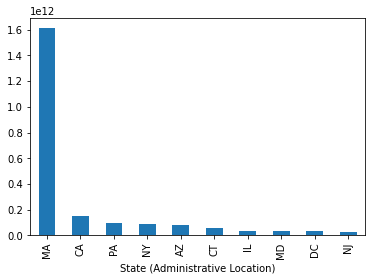

In [128]:
dados.groupby('State (Administrative Location)')['Income'].sum().sort_values(ascending=False).head(10).plot(kind= 'bar')

Nota-se que há um grande salto dos valores da receita de Washington para os demais estados, então foi investigado que essa diferença de valores de receita está atrelada a duplicidade no input de receitas para vários museus *Smithsonia*, isto é um problema.

In [129]:
dados[dados['Museum Name'].str.contains('SMITHSONIA')]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
5405,8401100059,SMITHSONIAN CENTER FOR FOLKLIFE AND CULTURAL H...,SMITHSONIAN INSTITUTION CENTER FOR FOLKLIFE PR...,NaN,GENERAL MUSEUM,NaN,955 LENFANT PLZ SW 2600,WASHINGTON,DC,20024,...,1.0,11.0,2,NaN,NaN,NaN,NaN,NaT,NaN,False
5406,8409502489,SMITHSONIAN GARDENS,SMITHSONIAN GARDENS,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,600 MARYLAND AVE SW SUITE 3300,WASHINGTON,DC,20013,...,1.0,11.0,2,NaN,NaN,NaN,NaN,NaT,NaN,False
5407,8401100062,SMITHSONIAN INSTITUTION AMERICAN ART MUSEUM,SMITHSONIAN INSTITUTION OFFICE OF THE COMPTROLLER,SMITHSONIAN INSTITUTION,ART MUSEUM,NaN,8TH & F STREET NW,WASHINGTON,DC,20560,...,1.0,11.0,2,530206027,201309.0,2.064935e+09,1.371587e+09,2013-09-01,-6.933482e+08,False
5408,8401100004,SMITHSONIAN INSTITUTION ARCHIVES,SMITHSONIAN INSTITUTION OFFICE OF THE COMPTROLLER,NaN,GENERAL MUSEUM,NaN,600 MARYLAND AVE SW,WASHINGTON,DC,20024,...,1.0,11.0,2,530206027,201309.0,2.064935e+09,1.371587e+09,2013-09-01,-6.933482e+08,False
5409,8401100067,SMITHSONIAN INSTITUTION ARCHIVES OF AMERICAN ART,SMITHSONIAN INSTITUTION ARCHIVES OF AMERICAN ART,NaN,ART MUSEUM,NaN,750 9TH STREET NW,WASHINGTON,DC,20001,...,1.0,11.0,2,NaN,NaN,NaN,NaN,NaT,NaN,False
5410,8401100064,SMITHSONIAN INSTITUTION ARTHUR M SACKLER GALLERY,SMITHSONIAN INSTITUTION OFFICE OF THE COMPTROLLER,SMITHSONIAN INSTITUTION,ART MUSEUM,NaN,1050 INDEPENDENCE AVE,WASHINGTON,DC,20560,...,1.0,11.0,2,530206027,201309.0,2.064935e+09,1.371587e+09,2013-09-01,-6.933482e+08,False
5411,8401100050,SMITHSONIAN INSTITUTION HIRSHHORN MUSEUM AND S...,SMITHSONIAN INSTITUTION HIRSHHORN MUSEUM AND S...,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,7TH & INDEPENDENCE SW,WASHINGTON,DC,20560,...,1.0,11.0,2,NaN,NaN,NaN,NaN,NaT,NaN,False
5412,8401100016,SMITHSONIAN INSTITUTION NATIONAL GALLERY OF ART,NATIONAL GALLERY OF ART,NaN,ART MUSEUM,NaN,ON THE NATIONAL MALL BE,WASHINGTON,DC,20565,...,1.0,11.0,2,536001666,201309.0,3.100422e+08,2.165573e+08,2013-09-01,-9.348488e+07,False
5413,8401100014,SMITHSONIAN INSTITUTION NATIONAL MUSEUM OF AFR...,SMITHSONIAN INSTITUTION NATIONAL MUSEUM OF AFR...,NaN,GENERAL MUSEUM,NaN,14TH ST CNSTTUTION AVE,WASHINGTON,DC,20560,...,1.0,11.0,2,NaN,NaN,NaN,NaN,NaT,NaN,False
5414,8401100022,SMITHSONIAN INSTITUTION NATIONAL POSTAL MUSEUM,SMITHSONIAN INSTITUTION NATIONAL POSTAL MUSEUM,NaN,GENERAL MUSEUM,NaN,2 MASSACHUSETTS AVE NE,WASHINGTON,DC,20002,...,1.0,11.0,2,NaN,NaN,NaN,NaN,NaT,NaN,False


Uma outra abordagem foi a verificação das cidades com a maior quantidade do mesmo tipo de museu.

In [130]:
dados.groupby('Museum Type')['City (Administrative Location)'].value_counts()

Museum Type                                    City (Administrative Location)
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER  WASHINGTON                        17
                                               CHICAGO                           11
                                               COLUMBUS                           8
                                               DALLAS                             8
                                               PHILADELPHIA                       8
                                                                                 ..
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION        WILLIAMSPORT                       1
                                               WILMER                             1
                                               WINSTON                            1
                                               YELLOW SPRINGS                     1
                                               ZEPHYRHILLS                        

Outra observação feita pelo grupo, foi "*Qual a quantidade de museus por tipo?*", utilizando a função *value_counts()* e a visualização gráfica, tivemos como resultado que museus de "*HISTORIC PRESERVATION*", apresentou a maior quantiadede de museus.

In [131]:
dados["Museum Type"].value_counts()

HISTORIC PRESERVATION                            13772
GENERAL MUSEUM                                    8587
ART MUSEUM                                        3077
HISTORY MUSEUM                                    2263
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER     1477
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM         988
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            563
CHILDREN'S MUSEUM                                  499
NATURAL HISTORY MUSEUM                             320
Name: Museum Type, dtype: int64

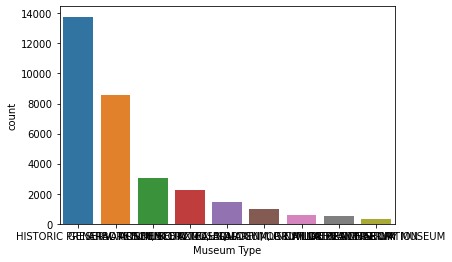

In [132]:
sns.countplot(x=dados["Museum Type"],order = dados["Museum Type"].value_counts().index)

Sendo assim, foi elencado e ordenado, de forma ascendente, os tipos de museu com maior receita.

In [133]:
print(dados.groupby('Museum Type')['Income'].mean().sort_values(ascending=False))

Museum Type
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       9.769073e+08
NATURAL HISTORY MUSEUM                           5.970365e+08
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER    4.838360e+08
ART MUSEUM                                       3.125325e+08
GENERAL MUSEUM                                   1.790560e+08
HISTORY MUSEUM                                   1.707319e+07
HISTORIC PRESERVATION                            1.027258e+07
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION          6.452933e+06
CHILDREN'S MUSEUM                                1.992903e+06
Name: Income, dtype: float64


Para verificar qual tipo de museu tem um maior lucro, foi verificado quais museus lucraram:

In [136]:
dados['Lucrou'].value_counts()

False    31525
True        21
Name: Lucrou, dtype: int64

In [137]:
dados[(dados.Lucrou)].head(5)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue,Tax Period - Date,Profit,Lucrou
2728,8400602228,MARIN HISTORY MUSEUM,MARIN HISTORY MUSEUM,NaN,HISTORY MUSEUM,NaN,1125 B ST,SAN RAFAEL,CA,94901,...,41.0,6.0,6,941642459,201306.0,143682.0,167921.0,2013-06-01,24239.0,True
5338,8401100080,KUSH,KUSH INC,NaN,GENERAL MUSEUM,NaN,4545 42ND ST NW STE 208,WASHINGTON,DC,20016,...,1.0,11.0,2,200472248,201102.0,150269.0,786583.0,2011-02-01,636314.0,True
6712,8401200584,WORLD AIDS MUSEUM,WORLD AIDS MUSEUM INCORPORATED,NaN,GENERAL MUSEUM,NaN,616 NE 15TH STREET,FORT LAUDERDALE,FL,33304,...,11.0,12.0,3,453419591,201312.0,113388.0,129634.0,2013-12-01,16246.0,True
9747,8401701328,WRYMOO RAILROAD HISTORICAL AND EDUCATIONAL SOC...,WRYMOO RAILROAD HISTORICAL & EDUC SOCIETY MODO...,NaN,HISTORIC PRESERVATION,NaN,PO BOX 325,MARION,IL,62959,...,145.0,21.0,3,680347484,201312.0,61654.0,469228.0,2013-12-01,407574.0,True
10256,8401800650,OUR HERITAGE,OUR HERITAGE INC,NaN,HISTORIC PRESERVATION,NaN,PO BOX 335,VERNON,IN,47282,...,NaN,18.0,4,356051149,201303.0,42233.0,42335.0,2013-03-01,102.0,True


Assim, foi feito um ranking dos museus com maior lucro. O museus *Smithsonia*, pelo que foi analisádo, não lucrou, dessa forma a duplicidade dos dados não interferiu nos resultados do ranking abaixo:


In [135]:
dados[(dados.Lucrou)]['Museum Type'].value_counts()

GENERAL MUSEUM                                6
HISTORIC PRESERVATION                         5
HISTORY MUSEUM                                4
ART MUSEUM                                    3
CHILDREN'S MUSEUM                             2
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM    1
Name: Museum Type, dtype: int64